# Q1) Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud=read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [8]:
fraud.insert(6,'tax_class'," ")

for i in range(0,len(fraud['Taxable.Income']),1):
    if fraud['Taxable.Income'].iloc[i]<=30000:
        fraud['tax_class'].iloc[i]='Risky'
    else:
        fraud['tax_class'].iloc[i]='Good'

C:\Users\Shivani\AppData\Local\Temp\ipykernel_15016\4107424386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['tax_class'].iloc[i]='Good'
C:\Users\Shivani\AppData\Local\Temp\ipykernel_15016\4107424386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['tax_class'].iloc[i]='Risky'


In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


In [10]:
fraud.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [11]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,2,50047,10,YES,Good
1,YES,0,134075,18,YES,Good
2,NO,1,160205,30,YES,Good
3,YES,2,193264,15,YES,Good
4,NO,1,27533,28,NO,Good


In [12]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['tax_class']= label_encoder.fit_transform(fraud['tax_class'])


In [13]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
fraud.iloc[:,2:4]=StandardScaler().fit_transform(fraud.iloc[:,2:4])
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


<AxesSubplot:>

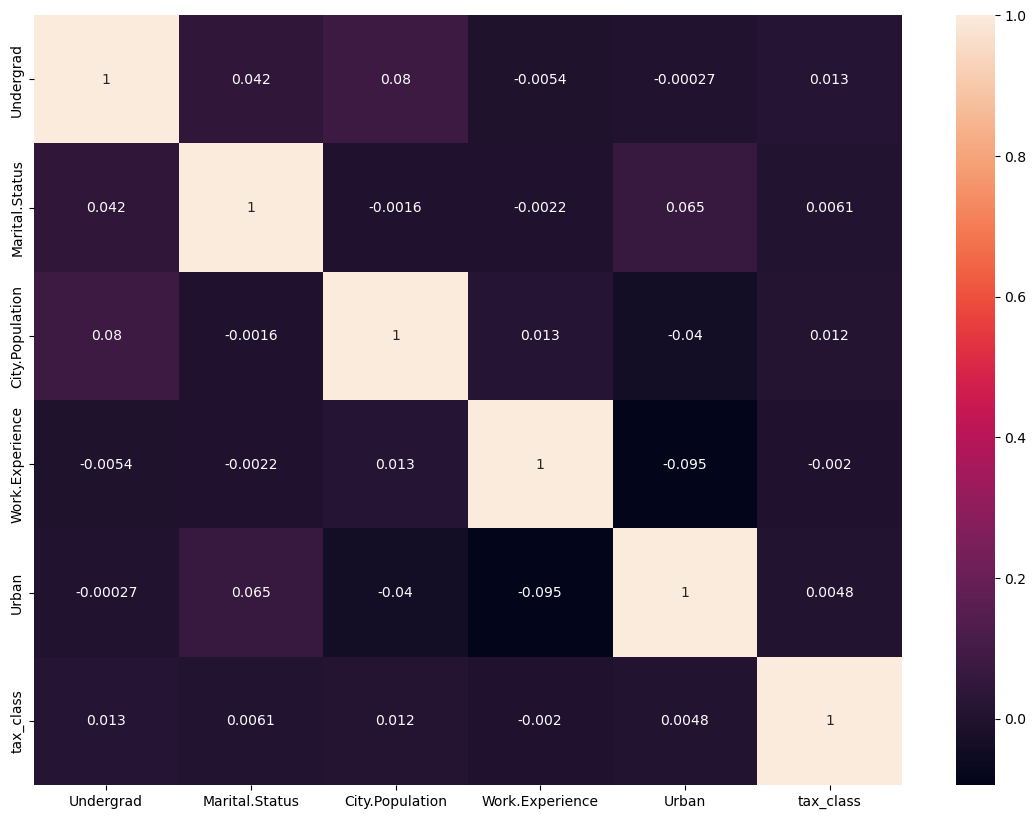

In [15]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(fraud.corr(),annot=True)

In [16]:
X=fraud.iloc[:,0:-1]
Y=fraud['tax_class']

# Random forest

In [17]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10) #Bootstrap

In [18]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7366666666666667


# Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 


kfold = KFold(n_splits=10) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees) #Classifier
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.74


# AdaBoost Classifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 15
seed=0
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7916666666666666


# XGBoost

In [21]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
X=fraud.iloc[:,0:-1]
y=fraud['tax_class']

In [23]:
# split data into train and test sets
seed = 0
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [24]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [26]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.73%


# LGBM

In [27]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [28]:
clf=LGBMClassifier(learning_rate=0.001,num_leaves=10,max_depth=3,n_estimators=500)
clf.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=500,
               num_leaves=10)

In [29]:
y_pred=clf.predict(X_test)

In [30]:
prediction=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


# Company data

In [31]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [32]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [33]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [34]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [35]:
df['Urban'] = np.where(df['Urban'].str.contains("Yes"), 1, 0)
df['US'] = np.where(df['US'].str.contains("Yes"), 1, 0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [51]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,0.155361,0.657177,276,120,0,42,17,1,1
1,11.22,111,-0.739060,1.409957,260,83,1,65,10,1,1
2,10.06,113,-1.204159,0.506621,269,80,2,59,12,1,1
3,7.40,117,1.121336,-0.396715,466,97,2,55,14,1,1
4,4.15,141,-0.166631,-0.547271,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,1.407551,1.560513,203,128,1,33,14,1,1
396,6.14,139,-1.633482,-0.547271,37,120,2,55,11,0,1
397,7.41,162,-1.526151,0.807733,368,159,2,40,18,1,1
398,5.94,100,0.370022,0.054953,284,95,0,50,12,1,1


<AxesSubplot:>

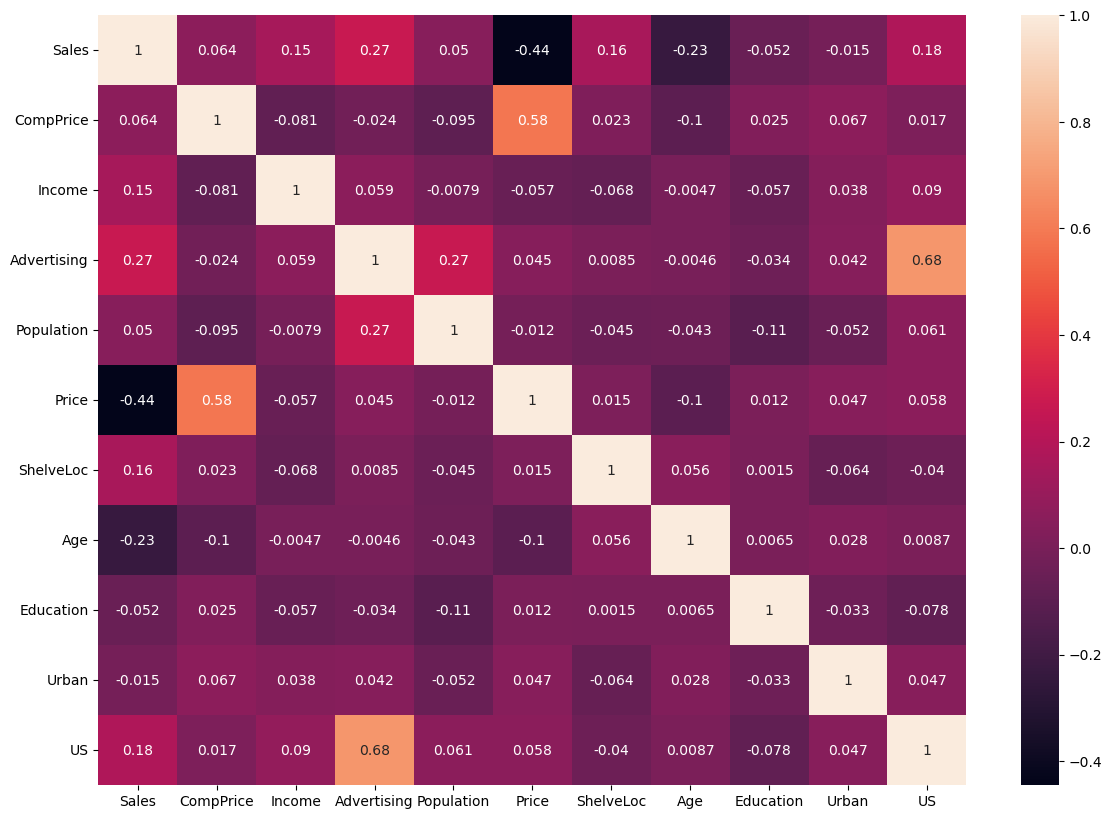

In [52]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [36]:
X=df.iloc[:,0:6]
Y=df['ShelveLoc']

# Random forest

In [37]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10) #Bootstrap

In [38]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.635


# Bagging Classifier

In [39]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 


kfold = KFold(n_splits=10) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees) #Classifier
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.635


# AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 15
seed=0
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.625


# XGBoost

In [41]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
X=df.iloc[:,0:6]
Y=df['ShelveLoc']

In [43]:
# split data into train and test sets
seed = 0
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [44]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.88%


# LGBM

In [47]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [48]:
clf=LGBMClassifier(learning_rate=0.001,num_leaves=10,max_depth=3,n_estimators=500)
clf.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=500,
               num_leaves=10)

In [49]:
y_pred=clf.predict(X_test)

In [50]:
prediction=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.06%
